# Random Imputation

- Random imputation is a statistical technique used to handle missing data.

- In this method, missing values are replaced with randomly selected values from the observed data of the same variable.

- The selection of values is usually done with equal probability from the available non-missing observations.

- This technique helps maintain the original distribution of the variable.

- Random imputation introduces natural variability into the dataset.

- However, it may increase random error and does not account for relationships with other variables.

- We use this technique when applying linear techniques or algorithm not when we are using tree based algorithm.

# Random Imputation in Numerical Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns


In [25]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [26]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [28]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 2)

In [30]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [31]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']


In [32]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [33]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [34]:
x_train['Age_imputed'].isnull().sum()

np.int64(148)

In [56]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


array([30.  , 25.  , 28.  , 30.  , 41.  ,  4.  , 29.  ,  2.  ,  2.  ,
       33.  , 38.  , 21.  , 54.  , 60.  , 17.  , 38.  , 30.  , 29.  ,
        0.83, 18.  , 34.  , 10.  ,  7.  ,  2.  , 64.  ,  9.  , 17.  ,
       48.  , 29.  , 52.  , 18.  , 37.  , 21.  , 24.  , 21.  , 26.  ,
        3.  , 36.  , 25.  , 47.  , 56.  , 54.  , 40.  , 29.  ,  4.  ,
       50.  , 65.  , 16.  , 20.  , 21.  , 34.  , 54.  , 62.  , 26.  ,
       35.  , 35.  , 43.  , 24.  , 36.  , 60.  , 31.  , 45.5 , 24.  ,
       28.  , 34.  , 36.  ,  4.  , 33.  ,  6.  , 35.  ,  2.  , 19.  ,
       34.  , 32.  , 18.  , 23.  , 32.  , 18.  , 36.  , 28.  , 19.  ,
       30.  , 62.  , 47.  , 29.  , 29.  , 35.  , 51.  , 32.  , 48.  ,
       31.  , 26.  , 19.  , 37.  ,  0.67, 43.  , 36.  , 23.  , 19.  ,
       15.  , 27.  , 37.  , 44.  , 39.  , 30.  , 23.5 , 26.  , 16.  ,
       12.  , 32.  , 45.  , 25.  , 27.  , 27.  , 35.  , 27.  , 30.  ,
       25.  , 14.5 , 26.  , 71.  , 17.  , 35.  , 37.  , 45.  , 27.  ,
       28.  , 18.  ,

In [41]:
# For training data
mask_train = x_train['Age_imputed'].isnull()
n_train = mask_train.sum()

x_train.loc[mask_train, 'Age_imputed'] = (
    x_train['Age']
    .dropna()
    .sample(n_train, replace=True)
    .values
)


In [42]:
# For test data
mask_test = x_test['Age_imputed'].isnull()
n_test = mask_test.sum()

x_test.loc[mask_test, 'Age_imputed'] = (
    x_train['Age']
    .dropna()
    .sample(n_test, replace=True)
    .values
)


In [43]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,65.0
493,71.0,49.5042,71.0
527,NaN,221.7792,18.0


/var/folders/by/1y9dyrg52t3_69n_jld52myh0000gn/T/ipykernel_21976/3925229177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
/var/folders/by/1y9dyrg52t3_69n_jld52myh0000gn/T/ipykernel_21976/3925229177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

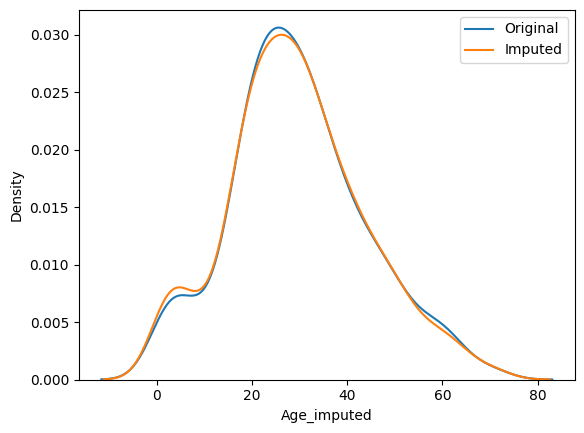

In [46]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()
# Here the distribution is almost same because we have used random imputation


In [48]:
print('Original variable variance: ', x_train['Age'].var())  #--> statistical measure of data dispersion
print('Variance after random imputation: ', x_train['Age_imputed'].var())  #--> variance calculates how far data value spread from the mean

Original variable variance:  204.3495133904614
Variance after random imputation:  206.97807873208328


In [49]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,49.739330
Age,71.512440,204.349513,204.349513
Age_imputed,49.739330,204.349513,206.978079


<Axes: >

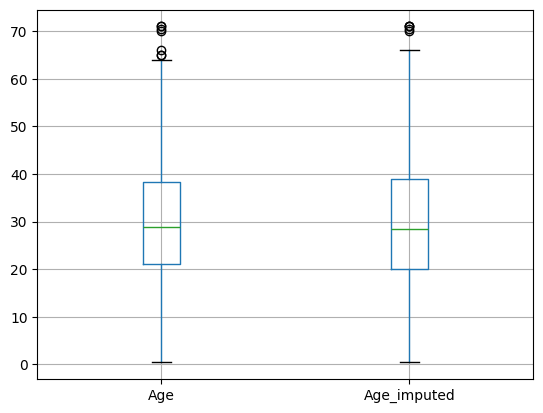

In [50]:
x_train[['Age','Age_imputed']].boxplot()

In [55]:
sampled_value = x_train['Age'].dropna().sample(1, random_state=42)
 # It randomly selects one non-missing Age value from the training data using Fare as a seed to ensure reproducible random imputation.



# Random Imputation in Categorical Data

In [61]:
data = pd.read_csv('housing.csv',usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [62]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [63]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [64]:
X = data
y = data['SalePrice']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [66]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']


In [67]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1016,TA,TA,203000,TA,TA
395,NaN,TA,129000,TA,NaN
1053,Gd,TA,144500,TA,Gd
962,TA,TA,155000,TA,TA
425,Gd,TA,135000,TA,Gd


In [68]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


/var/folders/by/1y9dyrg52t3_69n_jld52myh0000gn/T/ipykernel_21976/613679808.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_tr

In [69]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']


In [70]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [71]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp


,original,imputed
Gd,0.494272,0.643098
TA,0.412439,0.542088
Fa,0.040917,0.053872
Po,0.027823,0.038159
Ex,0.024550,0.033670


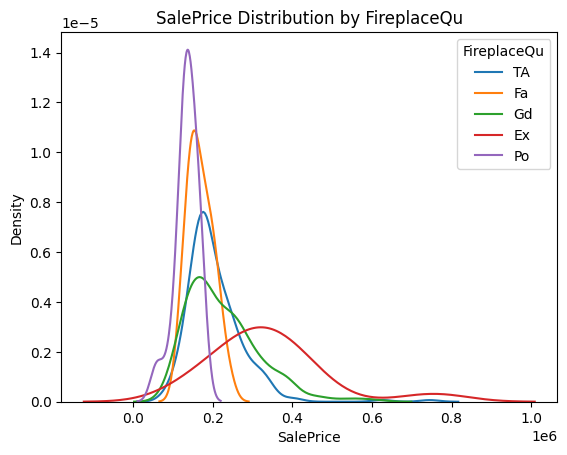

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu'] == category],
        x='SalePrice',
        label=category,
        fill=False  # like hist=False in distplot
    )

plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.title("SalePrice Distribution by FireplaceQu")
plt.legend(title='FireplaceQu')
plt.show()


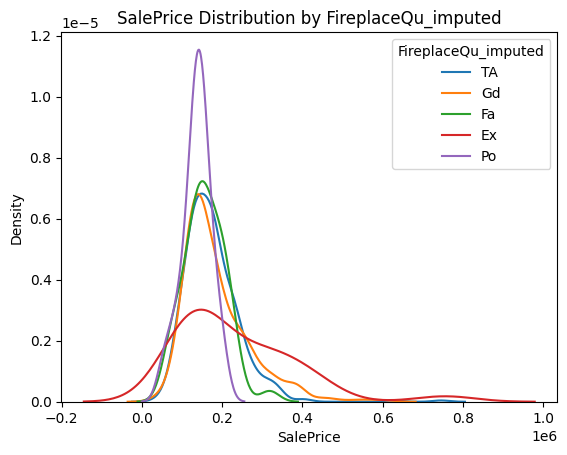

In [75]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu_imputed'] == category],
        x='SalePrice',
        label=category,
        fill=False  # same effect as hist=False
    )

plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.title("SalePrice Distribution by FireplaceQu_imputed")
plt.legend(title='FireplaceQu_imputed')
plt.show()
